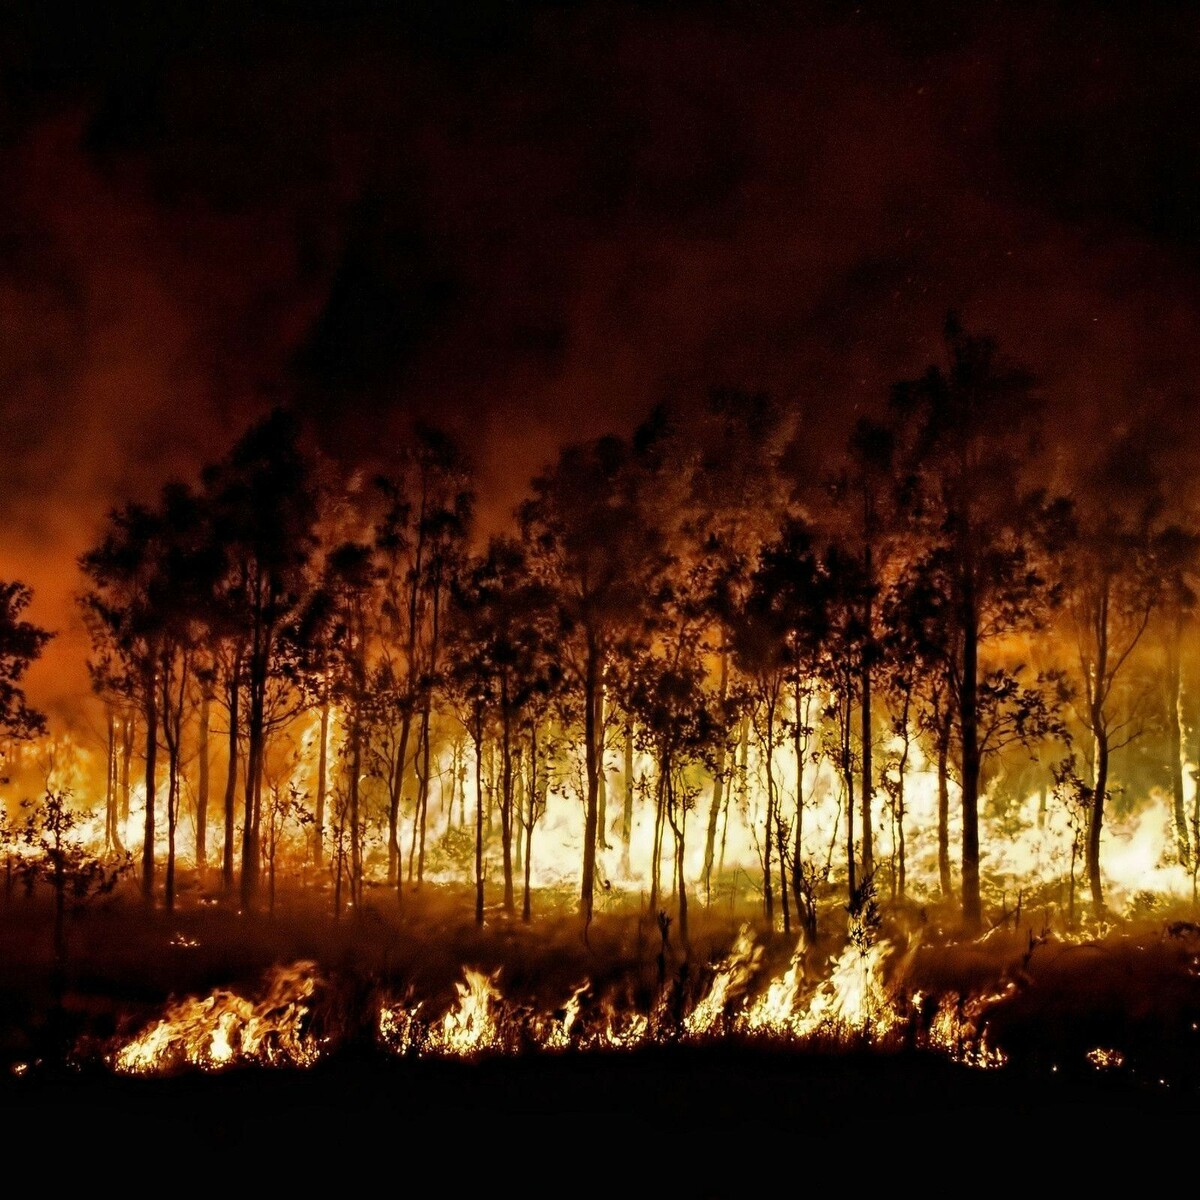

# Model Building on Algerian Forest Fires Dataset 

# Logistic Regression Algorithm Implementation

**Life cycle of Machine learning Project (Pipeline)**

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

# Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and notFire

# Data Set Information

- The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the 
 northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

- The period from June 2012 to September 2012.
- The dataset includes 13 columns and 244 rows 
- The 244 instances have been classified into fire (138 classes) and notfire(106 classes) classes.
- Source: https://drive.google.com/file/d/1Rg8FHIhyUATKBQ7rN6bDEh5iwuYB8gHd/view?usp=share_link

# Problem statement

- This dataset comprises features of forest fire which will lead to two classes fire and not fire in Bejaia region and Sidi Bel-abbes region of Algeria.
- User can predict the fire will occur or not based on input features.
- Target feature will be clases(fire / Not fire)
- independent feature will be all the features except Classes.

# Task:

**Perform Logistic Regression when:**
- When dataset is balanced build model with 90% accuracy.
- if dataset is imbalanced create a model by choosing Precision, Recall, F1-Beta score without handling imbalance dataset   

# What is Logistic Regression?

**Logistic regression is one such regression algorithm which can be used for performing classification problems. It calculates the probability that a given value belongs to a specific class. If the probability is more than 50%, it assigns the value in that particular class else if the probability is less than 50%, the value is assigned to the other class. Therefore, we can say that logistic regression acts as a binary classifier.**

**Importing Liberaries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**importing cleanned Dataset**

In [3]:
df = pd.read_csv('Algerian double-Cleanned dataset.csv')

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes,Region,Date
0,0,0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.5,0.0,Bejaia,2012-06-01
1,1,1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.4,0.0,Bejaia,2012-06-02
2,2,2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.1,0.0,Bejaia,2012-06-03
3,3,3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,0.0,Bejaia,2012-06-04
4,4,4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.5,0.0,Bejaia,2012-06-05


**Here in Classes column-**
- Not fire: 0 
- Fire : 1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  244 non-null    int64  
 1   Unnamed: 0    244 non-null    int64  
 2   Temperature   244 non-null    int64  
 3   RH            244 non-null    int64  
 4   Ws            244 non-null    float64
 5   Rain          244 non-null    float64
 6   FFMC          244 non-null    float64
 7   DMC           244 non-null    float64
 8   ISI           244 non-null    float64
 9   BUI           244 non-null    float64
 10  FWI           244 non-null    float64
 11  Classes       244 non-null    float64
 12  Region        244 non-null    object 
 13  Date          244 non-null    object 
dtypes: float64(8), int64(4), object(2)
memory usage: 26.8+ KB


In [6]:
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)

**Replacing the values of 'Region' feature with:**
- 0 : 'Bejaia'
- 1 : 'Sidi-Bel Abbes'

In [7]:
df['Region'].unique()

array(['Bejaia', 'Sidi Bel-abbes'], dtype=object)

**using Label encoding**

In [8]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Region']= label_encoder.fit_transform(df['Region'])
  
df['Region'].unique()

array([0, 1])

In [9]:
#df['Region'] = df['Region'].replace('Bejaia',0)
#df['Region'] = df['Region'].replace('Sidi-Bel Abbes',1)

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes,Region,Date
0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.5,0.0,0,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.4,0.0,0,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.1,0.0,0,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,0.0,0,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.5,0.0,0,2012-06-05


In [11]:
df['Region']=df['Region'].astype(str).astype(int)
#df['Region'] = pd.to_numeric(df['Region'])

In [12]:
df['Region'].dtype

dtype('int32')

In [13]:
#now all features are converted into numerical features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    int64  
 1   RH           244 non-null    int64  
 2   Ws           244 non-null    float64
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   ISI          244 non-null    float64
 7   BUI          244 non-null    float64
 8   FWI          244 non-null    float64
 9   Classes      244 non-null    float64
 10  Region       244 non-null    int32  
 11  Date         244 non-null    object 
dtypes: float64(8), int32(1), int64(2), object(1)
memory usage: 22.0+ KB


In [14]:
df.shape

(244, 12)

# Statistical Representation

In [15]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.00000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,7.02377,0.565574,0.500000
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,7.42746,0.496700,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.00000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.70000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,4.20000,1.000000,0.500000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,11.37500,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,31.10000,1.000000,1.000000


In [16]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
Date           0
dtype: int64

**Observation**
- no missing value is present in the dataset.

In [17]:
df.cov()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes,Region
Temperature,13.204817,-35.396782,-2.840215,-2.374270,35.297598,21.712423,9.218043,23.512265,15.177785,0.935168,0.497942
RH,-35.396782,221.539415,9.874739,6.635431,-137.785533,-74.580245,-42.920524,-73.700941,-63.542154,-3.216117,-3.030864
Ws,-2.840215,9.874739,7.897102,0.956129,-6.577727,-0.043306,0.178913,1.187799,0.645170,-0.092862,-0.248971
Rain,-2.374270,6.635431,0.956129,3.997623,-15.595918,-7.135415,-2.897687,-8.496825,-4.809061,-0.376833,-0.041152
FFMC,35.297598,-137.785533,-6.577727,-15.595918,205.565939,106.820535,44.283138,120.090018,73.359635,5.484349,1.613992
DMC,21.712423,-74.580245,-0.043306,-7.135415,106.820535,152.968382,34.831449,172.536341,80.452858,3.588791,1.184156
ISI,9.218043,-42.920524,0.178913,-2.897687,44.283138,34.831449,17.433281,37.714477,28.319011,1.525363,0.561523
BUI,23.512265,-73.700941,1.187799,-8.496825,120.090018,172.536341,37.714477,201.777024,90.530800,4.119605,0.621811
FWI,15.177785,-63.542154,0.645170,-4.809061,73.359635,80.452858,28.319011,90.530800,55.167169,2.643291,0.725926
Classes,0.935168,-3.216117,-0.092862,-0.376833,5.484349,3.588791,1.525363,4.119605,2.643291,0.246711,0.041152


In [18]:
#create a copy
df1= df.copy()

In [19]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes,Region,Date
0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.5,0.0,0,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.4,0.0,0,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.1,0.0,0,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,0.0,0,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.5,0.0,0,2012-06-05


# Graphical Representation of Features

ValueError: could not convert string to float: '2012-06-01'

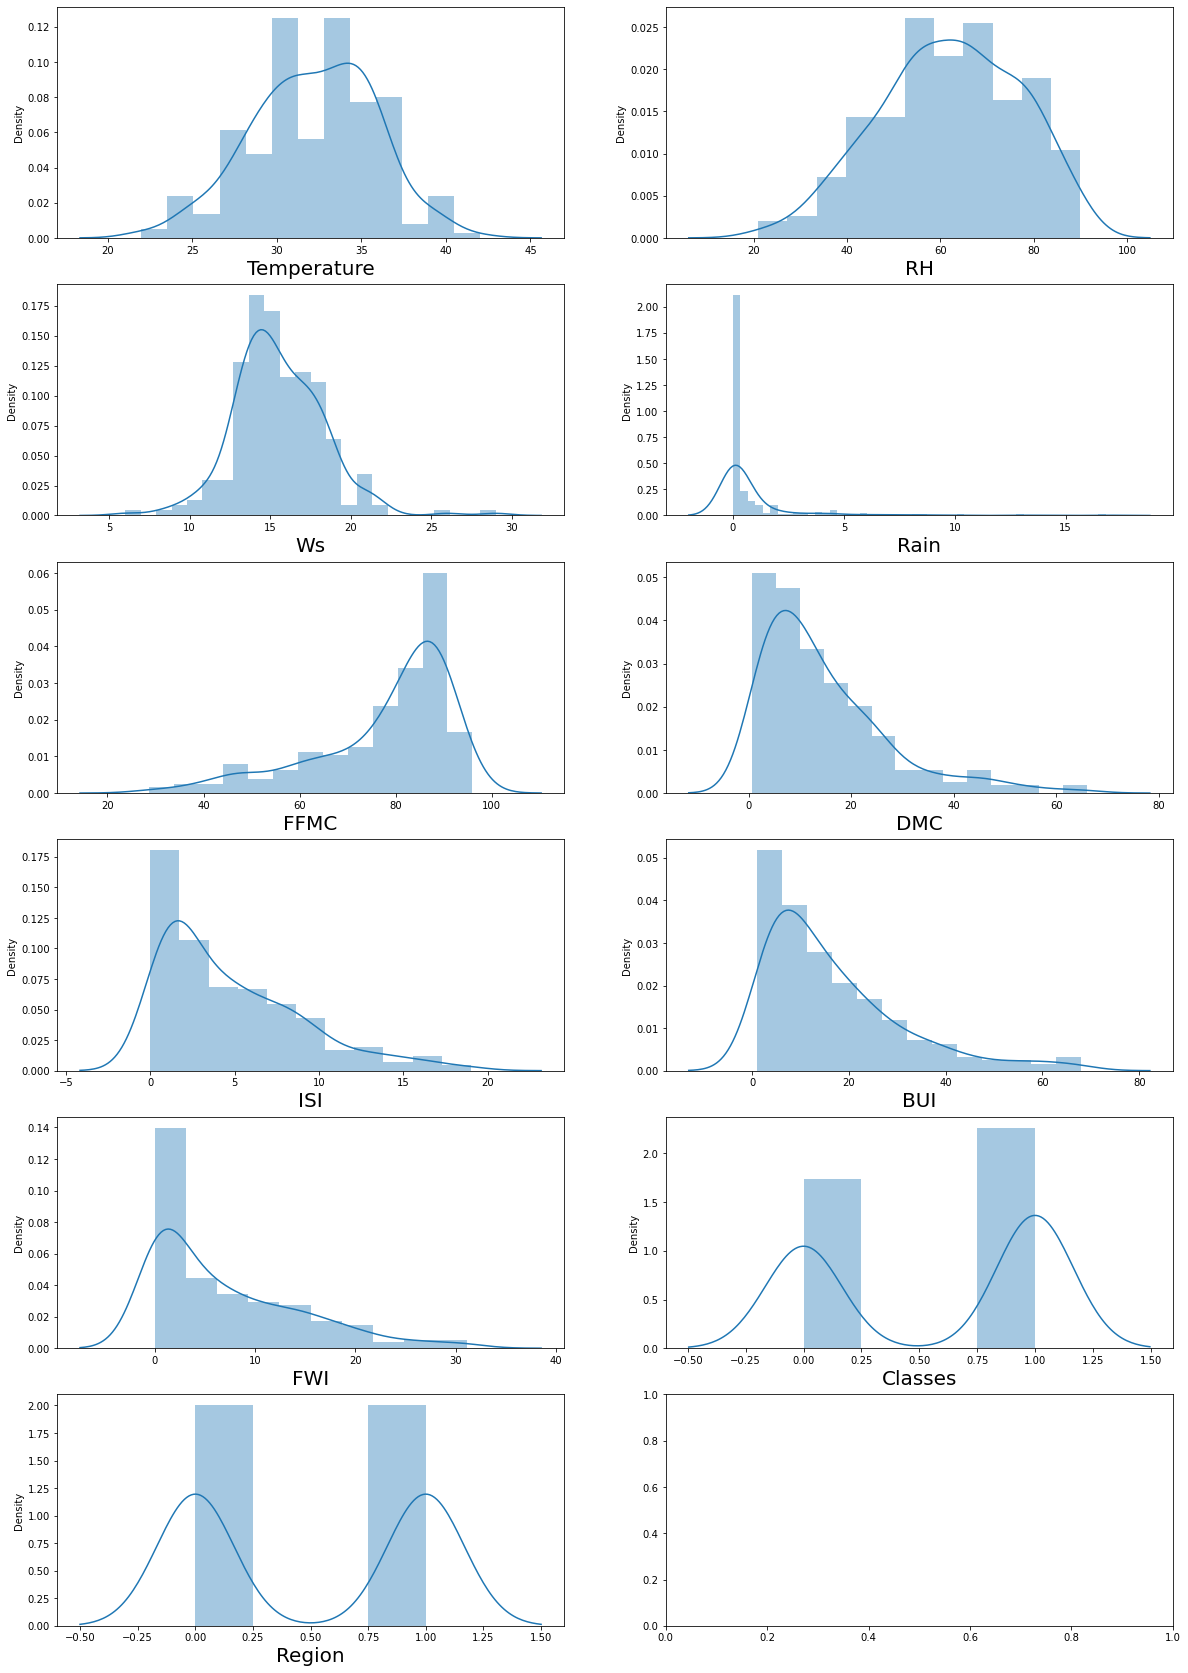

In [20]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in df1:
    if plotnumber<=12 :     # as there are 12 columns in the data
        ax = plt.subplot(8,2,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

**Observations**
- Rain, DMC, DC, FWI,ISI,BUI are rightly skewed(log normal distribution)

In [ ]:
#Heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df1.corr(),cmap="CMRmap", annot=True);

**Target feature: Classes**

In [21]:
df['Classes'].value_counts()

1.0    138
0.0    106
Name: Classes, dtype: int64

**Here in Classes column-**
- Not fire: 0 
- Fire : 1


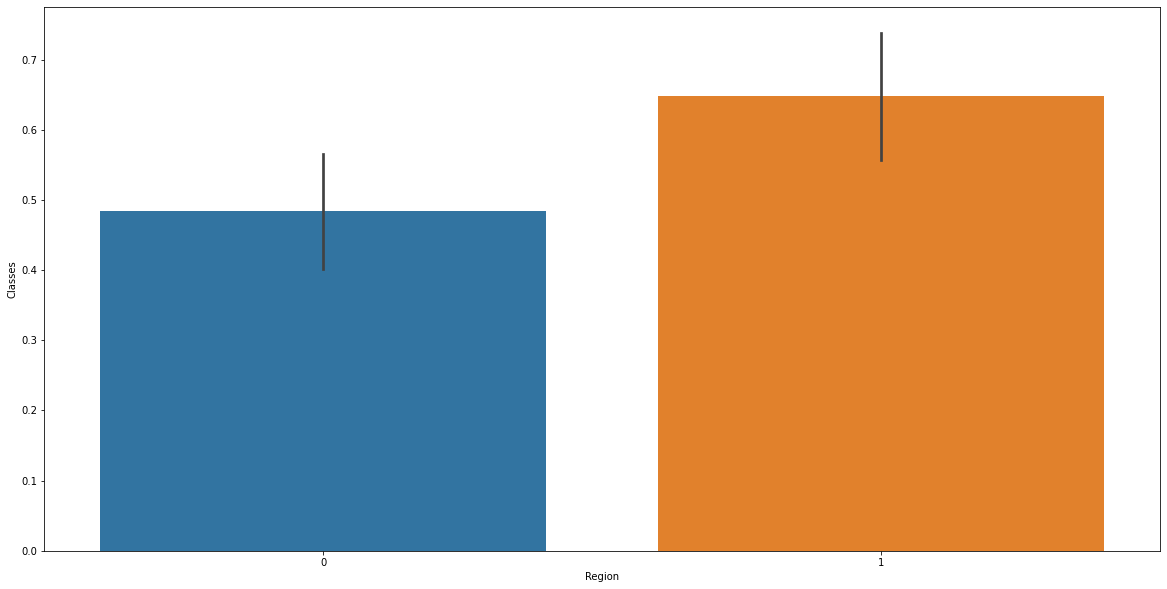

In [22]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x="Region",y="Classes",data=df1);

**Observation**
- Sidi Bel-abbes region has most fire

# Model Building

# Creating Independent and Dependent Features

In [23]:
x = df1.drop(['Classes', 'Date'], axis=1)
y = df1['Classes']

In [24]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Region
0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.5,0
1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.4,0
2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.1,0
3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,0
4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.5,0


In [25]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Classes, dtype: float64

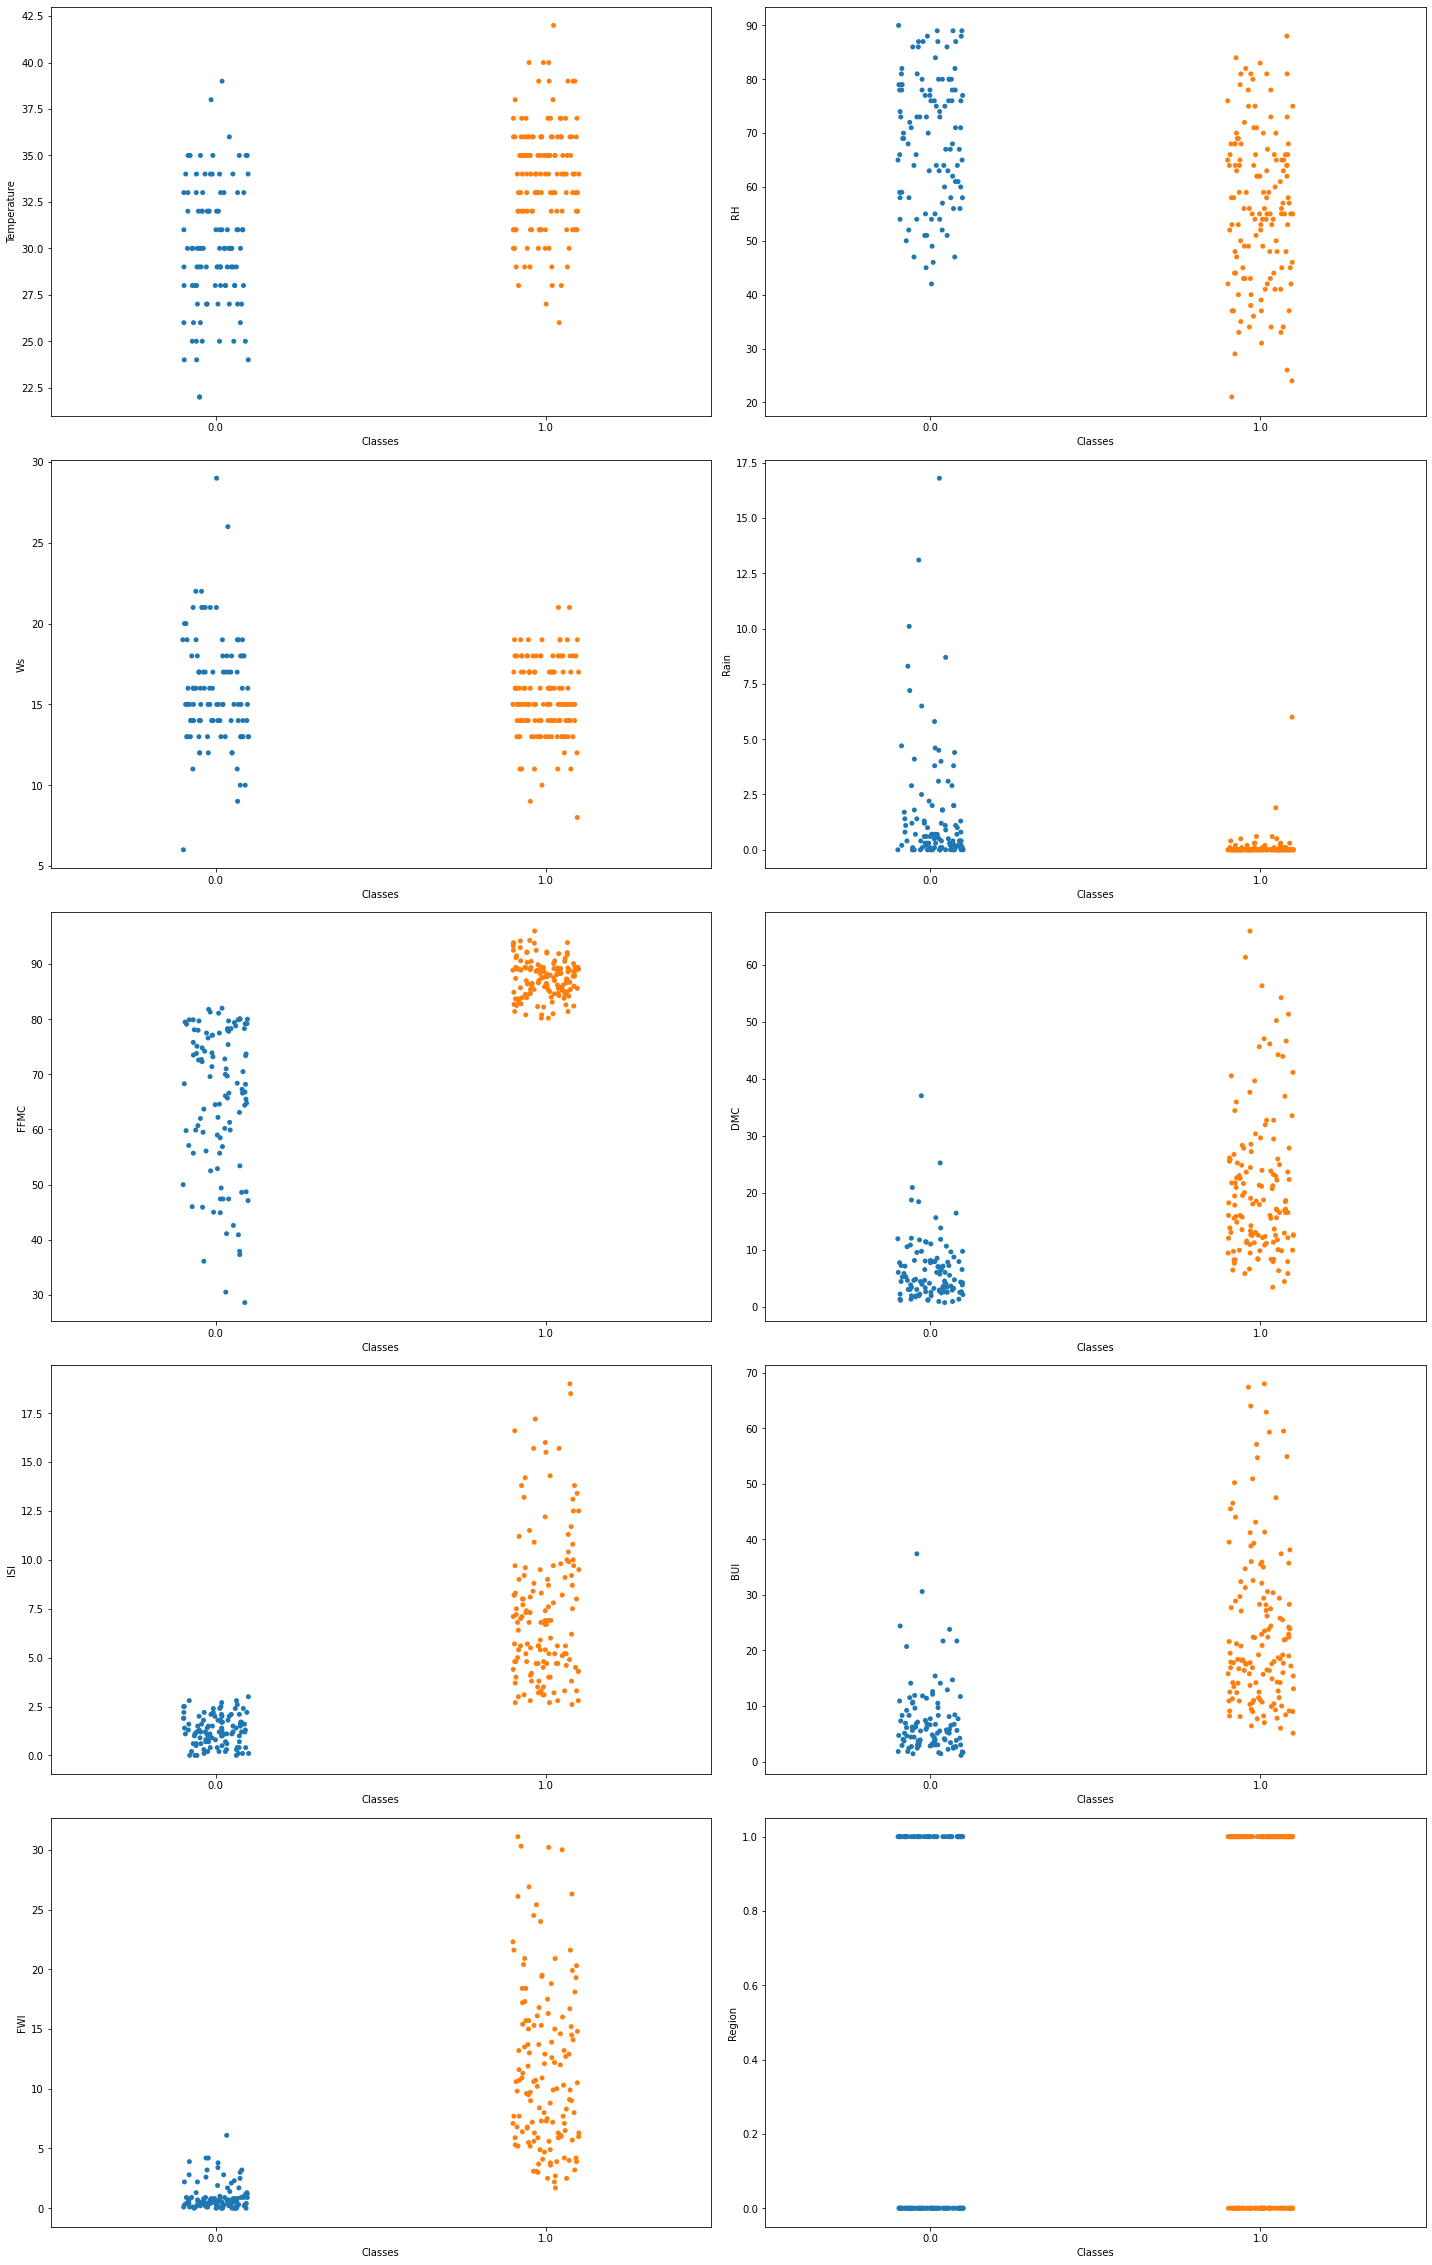

In [26]:
# Visualizing the relationship between our independent and dependent Features
plt.figure(figsize=(20,50), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(8,2,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

# Train and Test split

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [28]:
x_train.shape, y_train.shape

((183, 10), (183,))

In [29]:
x_test.shape, y_test.shape

((61, 10), (61,))

# Feature Scaling or standardize the dataset

In [30]:
#Standardize or Feature Scaling the dataset
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
scaler

StandardScaler()

In [32]:
#Apply scaler on train and test data
x_train_tf = scaler.fit_transform(x_train)
x_test_tf = scaler.transform(x_test)

In [33]:
x_train_tf

array([[-0.81085018,  0.16311382,  1.29231566, ..., -0.7596667 ,
        -0.84757842, -1.00547949],
       [ 1.06405791, -0.44884168,  0.15167049, ...,  0.49583584,
         0.85494673,  0.99455037],
       [-0.27516216,  0.63907922, -0.60875963, ..., -0.52949124,
        -0.41173199,  0.99455037],
       ...,
       [-1.88222624,  0.91105944,  0.53188555, ..., -1.03866727,
        -0.92929963, -1.00547949],
       [ 0.26052587, -0.38084663,  0.15167049, ..., -0.0691403 ,
         0.28289828,  0.99455037],
       [-0.54300617,  0.9790545 ,  2.05274578, ..., -0.99681719,
        -0.90205923, -1.00547949]])

In [34]:
x_test_tf

array([[-2.75162156e-01,  9.51187672e-02, -2.28544571e-01,
        -3.81132246e-01,  6.38241722e-01, -4.01362602e-02,
         2.37573464e-01,  1.12210064e-01,  2.01177071e-01,
        -1.00547949e+00],
       [ 2.60525871e-01, -5.84831795e-01, -9.88974688e-01,
        -3.81132246e-01,  7.42136256e-01, -3.84555270e-01,
         4.06084874e-01, -4.03940983e-01,  3.77346559e-02,
        -1.00547949e+00],
       [ 2.60525871e-01, -9.92802132e-01,  1.51670488e-01,
        -3.81132246e-01,  7.00578442e-01, -5.44750158e-01,
         5.02377108e-01, -6.20166421e-01, -7.12269540e-02,
         9.94550368e-01],
       [ 7.96213899e-01, -6.52826851e-01,  5.31885546e-01,
        -1.47707879e-01,  1.88032075e-01,  4.80497126e-01,
        -4.84618295e-01,  9.70136803e-01, -1.39327960e-01,
         9.94550368e-01],
       [ 2.13543397e+00, -1.46876753e+00, -2.12961986e+00,
        -3.34447373e-01,  1.00533574e+00,  6.32682270e-01,
         1.15234969e+00,  5.23735898e-01,  1.07286995e+00,
         9.

# Importing sklearn liberaries

In [35]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# 1) Logistic Regression Model on Balanced Dataset

In [36]:
model1 = LogisticRegression()
model1

LogisticRegression()

In [37]:
model1.fit(x_train_tf,y_train)

LogisticRegression()

In [38]:
model1.score(x_train_tf,y_train)
#train accuracy

0.9781420765027322

In [39]:
y_pred1 = model1.predict(x_test_tf)
y_pred1
#predicted value

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1.])

In [40]:
y_test
#actual value

24     1.0
6      1.0
153    1.0
211    1.0
198    1.0
      ... 
172    1.0
242    0.0
152    0.0
231    1.0
155    1.0
Name: Classes, Length: 61, dtype: float64

In [41]:
accuracy_score(y_test, y_pred1)

0.9672131147540983

In [42]:
x_test_tf[0]

array([-0.27516216,  0.09511877, -0.22854457, -0.38113225,  0.63824172,
       -0.04013626,  0.23757346,  0.11221006,  0.20117707, -1.00547949])

In [43]:
model1.predict([[-0.27516216,  0.09511877, -0.22854457, -0.38113225,  0.63824172,
       -0.04013626,  0.23757346,  0.11221006,  0.20117707, -1.00547949]])

array([1.])

In [44]:
#single value prediction for 1st row

# Performance Metrics

**1) Confusion Metrics**


In [45]:
conf_mat=confusion_matrix(y_pred1,y_test)
conf_mat

array([[24,  2],
       [ 0, 35]], dtype=int64)

In [46]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

**formula for Accuracy**

In [47]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9672131147540983

**Observation**
- Same as Accuracy above (either using accuracy formula or using accuracy_score() gives same result)

In [48]:
#precision
Precision = true_positive/(true_positive+false_positive)
Precision

0.9230769230769231

In [49]:
#recall
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

In [50]:
# F1 Beta score
F1_score = (2 * (Precision * Recall)) / (Precision + Recall)
F1_score

0.9600000000000001

# Acc. to Task, Creating Imbalance dataset from the original balanced dataset

In [51]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes,Region,Date
0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.5,0.0,0,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.4,0.0,0,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.1,0.0,0,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,0.0,0,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.5,0.0,0,2012-06-05


In [52]:
df.shape

(244, 12)

In [53]:
### Creating imbalance dataset
### 1. splitting data in 90:10 percent ratio using train test split
X = df1.drop(['Classes', 'Date'], axis=1)
Y = df1['Classes']

In [54]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Region
0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.5,0
1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.4,0
2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.1,0
3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,0
4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.5,0


In [55]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Classes, dtype: float64

# Train and Test Split in 90:10 ratio

In [56]:
x_train_imb, x_test_imb, y_train_imb, y_test_imb = train_test_split(X, Y, test_size=0.10, random_state=17)

In [57]:
x_train_imb.shape, y_train_imb.shape

((219, 10), (219,))

In [58]:
x_test_imb.shape, y_test_imb.shape

((25, 10), (25,))

**Replacing all values as '1' in y_train and all values as '0' in y_test to create imbalance dataset**

In [59]:
y_train_imb=y_train_imb.replace(0,1)
y_train_imb.head()

156    1.0
183    1.0
11     1.0
75     1.0
130    1.0
Name: Classes, dtype: float64

In [60]:
y_test_imb = y_test_imb.replace(1,0)
y_train_imb.head()

156    1.0
183    1.0
11     1.0
75     1.0
130    1.0
Name: Classes, dtype: float64

In [61]:
x_train_imb.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Region
156,34,45,18.0,0.0,90.5,18.7,11.3,18.7,15.0,1
183,38,52,14.0,0.0,78.3,4.4,2.0,4.4,0.8,1
11,26,81,19.0,0.0,84.0,13.8,4.8,17.7,7.1,0
75,36,55,13.0,0.3,82.4,15.6,3.7,22.0,6.3,0
130,27,59,18.0,0.1,78.1,8.5,2.4,8.3,1.9,1


In [62]:
### Combining X_train_imb and y_train_imb
train_imb=x_train_imb.join(pd.DataFrame(y_train_imb))
train_imb.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Region,Classes
156,34,45,18.0,0.0,90.5,18.7,11.3,18.7,15.0,1,1.0
183,38,52,14.0,0.0,78.3,4.4,2.0,4.4,0.8,1,1.0
11,26,81,19.0,0.0,84.0,13.8,4.8,17.7,7.1,0,1.0
75,36,55,13.0,0.3,82.4,15.6,3.7,22.0,6.3,0,1.0
130,27,59,18.0,0.1,78.1,8.5,2.4,8.3,1.9,1,1.0


In [63]:
### Combining X_test_imb and y_test_imb
test_imb=x_test_imb.join(pd.DataFrame(y_test_imb))
test_imb.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Region,Classes
48,35,59,17.0,0.0,88.1,12.0,7.7,18.2,10.9,0,0.0
216,28,75,16.0,0.0,82.2,4.4,3.3,6.0,2.5,1,0.0
101,33,73,12.0,1.8,59.9,2.2,0.7,2.7,0.3,0,0.0
38,32,68,14.0,1.4,66.6,7.7,1.1,7.4,0.6,0,0.0
86,31,78,18.0,0.0,85.8,45.6,4.7,57.1,13.7,0,0.0


In [64]:
# shape of imbalanced Data: train & test
train_imb.shape, test_imb.shape

((219, 11), (25, 11))

In [65]:
### Combining 'train_imb' dataset and 'test_imb' dataset into 'df_imb dataset 
df_imb=pd.concat([train_imb, test_imb], ignore_index=True, sort=False)
df_imb.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Region,Classes
0,34,45,18.0,0.0,90.5,18.7,11.3,18.7,15.0,1,1.0
1,38,52,14.0,0.0,78.3,4.4,2.0,4.4,0.8,1,1.0
2,26,81,19.0,0.0,84.0,13.8,4.8,17.7,7.1,0,1.0
3,36,55,13.0,0.3,82.4,15.6,3.7,22.0,6.3,0,1.0
4,27,59,18.0,0.1,78.1,8.5,2.4,8.3,1.9,1,1.0


**Observation: now it is unbalanced data set**

In [66]:
#shape of imbalance dataset 
df_imb.shape

(244, 11)

**Now comparison b/w 'Imbalanced dataset' & 'Balanced dataset' counts**
- where '0' depicts no fire  and '1' depicts fire

In [67]:
df_imb['Classes'].value_counts()

1.0    219
0.0     25
Name: Classes, dtype: int64

In [68]:
df['Classes'].value_counts()

1.0    138
0.0    106
Name: Classes, dtype: int64

# 2) Logistic Regression on imbalanced Dataset

# Separating Independent and Dependent feature from Imbalanced Dataset

In [69]:
x1 = df_imb.drop(['Classes'],axis=1)

In [70]:
y1 = df_imb['Classes']

In [71]:
x1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Region
0,34,45,18.0,0.0,90.5,18.7,11.3,18.7,15.0,1
1,38,52,14.0,0.0,78.3,4.4,2.0,4.4,0.8,1
2,26,81,19.0,0.0,84.0,13.8,4.8,17.7,7.1,0
3,36,55,13.0,0.3,82.4,15.6,3.7,22.0,6.3,0
4,27,59,18.0,0.1,78.1,8.5,2.4,8.3,1.9,1


In [72]:
y1.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Classes, dtype: float64

In [73]:
df.shape

(244, 12)

# Graph showing Imbalanced Data

Text(0, 0.5, 'Frequency')

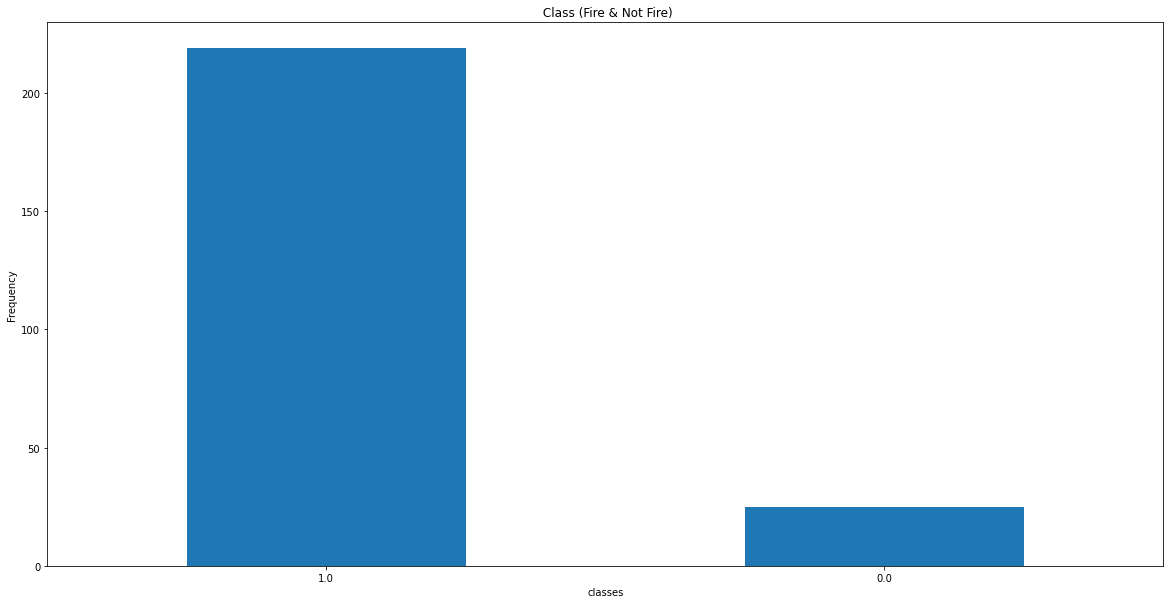

In [74]:
count_classes = pd.value_counts (df_imb['Classes'], sort=True)
count_classes.plot(kind= "bar", rot=0)
plt.title(" Class (Fire & Not Fire)")
#plt.xticks(range(2), LABELS)
plt.xlabel("classes")
plt.ylabel("Frequency")

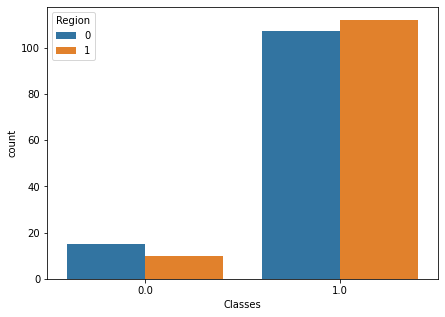

In [75]:
## 0 is 'Bejaia' and 1 is 'Sidi Bel-abbes region'
plt.figure(figsize=(7,5))
sns.countplot(data=df_imb,x='Classes',hue='Region');

In [76]:
#dependent Features (Fire, Not Fire)
Fire = df_imb[df_imb['Classes'] == 1 ]
Not_fire = df_imb[df_imb['Classes'] == 0]

**Shape**

In [77]:
print(Fire.shape, Not_fire.shape)

(219, 11) (25, 11)


# **Observation**
- Perfect Example of Imbalance Dataset as fire has huge frequency(>200) and not fire has very less.
- Here we have small dataset so we use 'UpSampling'. For huge datasets we use 'UnderSampling'. 

# Handling Imbalance Dataset using UpSampling(or OverSampling)

**We are using UpSampling as we have small Dataset**

In [78]:
!pip install imbalanced-learn

In [79]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [85]:
from imblearn.combine import SMOTETomek
#implementing oversampling

In [86]:
smk = SMOTETomek(random_state=32)
x_res, y_res = smk.fit_resample(x1,y1)

In [87]:
x_res.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Region
0,34,45,18.0,0.0,90.5,18.7,11.3,18.7,15.0,1
1,38,52,14.0,0.0,78.3,4.4,2.0,4.4,0.8,1
2,26,81,19.0,0.0,84.0,13.8,4.8,17.7,7.1,0
3,36,55,13.0,0.3,82.4,15.6,3.7,22.0,6.3,0
4,27,59,18.0,0.1,78.1,8.5,2.4,8.3,1.9,1


In [88]:
y_res.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Classes, dtype: float64

In [89]:
print(x_res.shape, y_res.shape)

(416, 10) (416,)


**Observation:**
- Here now we are able to balace both features using UpSampling

**Creating Balanced data from imbalanced data**

In [90]:
df_bal=x_res.join(pd.DataFrame(y_res))
df_bal.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Region,Classes
0,34,45,18.0,0.0,90.5,18.7,11.3,18.7,15.0,1,1.0
1,38,52,14.0,0.0,78.3,4.4,2.0,4.4,0.8,1,1.0
2,26,81,19.0,0.0,84.0,13.8,4.8,17.7,7.1,0,1.0
3,36,55,13.0,0.3,82.4,15.6,3.7,22.0,6.3,0,1.0
4,27,59,18.0,0.1,78.1,8.5,2.4,8.3,1.9,1,1.0


# EDA on Balance dataset (df_bal)

In [91]:
df_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  416 non-null    int64  
 1   RH           416 non-null    int64  
 2   Ws           416 non-null    float64
 3   Rain         416 non-null    float64
 4   FFMC         416 non-null    float64
 5   DMC          416 non-null    float64
 6   ISI          416 non-null    float64
 7   BUI          416 non-null    float64
 8   FWI          416 non-null    float64
 9   Region       416 non-null    int32  
 10  Classes      416 non-null    float64
dtypes: float64(8), int32(1), int64(2)
memory usage: 34.2 KB


In [92]:
df_bal.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
ISI            0
BUI            0
FWI            0
Region         0
Classes        0
dtype: int64

In [115]:
df_bal.shape

(416, 11)

# Statistical Analysis

In [94]:
df_bal.describe(include='all')

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Region,Classes
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,32.259615,61.711538,15.678801,0.544444,79.258126,15.092328,4.887959,17.440076,7.330520,0.348558,0.500000
std,3.310429,13.710376,2.583208,1.575762,12.574139,12.537433,3.743735,14.146910,6.958438,0.477087,0.500602
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.750000,14.000000,0.000000,73.354920,5.847255,1.633874,6.000000,0.800000,0.000000,0.000000
50%,32.000000,64.000000,15.844662,0.000000,84.700000,12.277981,4.317045,15.546159,5.882529,0.000000,0.500000
75%,35.000000,72.000000,17.288684,0.300000,87.913427,19.647949,7.182904,22.798258,11.930460,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,31.100000,1.000000,1.000000


In [96]:
df_bal.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Region,Classes
Temperature,1.000000,-0.671695,-0.311011,-0.283302,0.660314,0.411948,0.636322,0.408277,0.566967,0.238552,-0.058161
RH,-0.671695,1.000000,0.275398,0.198922,-0.602289,-0.344530,-0.650153,-0.310232,-0.535177,-0.381713,-0.005266
Ws,-0.311011,0.275398,1.000000,0.085100,-0.076846,0.066125,0.026097,0.109631,0.062680,-0.208173,-0.086070
Rain,-0.283302,0.198922,0.085100,1.000000,-0.542782,-0.252504,-0.345957,-0.273067,-0.315491,0.019013,0.203308
FFMC,0.660314,-0.602289,-0.076846,-0.542782,1.000000,0.577880,0.772113,0.589797,0.716031,0.163613,-0.154498
DMC,0.411948,-0.344530,0.066125,-0.252504,0.577880,1.000000,0.649008,0.983275,0.860259,0.148594,-0.086117
ISI,0.636322,-0.650153,0.026097,-0.345957,0.772113,0.649008,1.000000,0.639506,0.918777,0.246069,-0.050910
BUI,0.408277,-0.310232,0.109631,-0.273067,0.589797,0.983275,0.639506,1.000000,0.859859,0.060392,-0.119304
FWI,0.566967,-0.535177,0.062680,-0.315491,0.716031,0.860259,0.918777,0.859859,1.000000,0.177621,-0.087332
Region,0.238552,-0.381713,-0.208173,0.019013,0.163613,0.148594,0.246069,0.060392,0.177621,1.000000,0.368260


In [97]:
df_bal.cov()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Region,Classes
Temperature,10.958943,-30.486376,-2.659615,-1.477831,27.486097,17.097625,7.886179,19.120582,13.060325,0.376761,-0.096386
RH,-30.486376,187.974421,9.753703,4.297563,-103.832301,-59.222302,-33.371077,-60.172522,-51.057373,-2.496803,-0.036145
Ws,-2.659615,9.753703,6.672962,0.346403,-2.496068,2.141584,0.252382,4.006402,1.126682,-0.256556,-0.111303
Rain,-1.477831,4.297563,0.346403,2.483027,-10.754600,-4.988467,-2.040880,-6.087258,-3.459308,0.014293,0.160375
FFMC,27.486097,-103.832301,-2.496068,-10.754600,158.108962,91.101309,36.346645,104.916133,62.650127,0.981506,-0.972506
DMC,17.097625,-59.222302,2.141584,-4.988467,91.101309,157.187215,30.462366,174.399443,75.049850,0.888810,-0.540492
ISI,7.886179,-33.371077,0.252382,-2.040880,36.346645,30.462366,14.015555,33.869690,23.934637,0.439502,-0.095411
BUI,19.120582,-60.172522,4.006402,-6.087258,104.916133,174.399443,33.869690,200.135056,84.644811,0.407602,-0.844905
FWI,13.060325,-51.057373,1.126682,-3.459308,62.650127,75.049850,23.934637,84.644811,48.419856,0.589663,-0.304213
Region,0.376761,-2.496803,-0.256556,0.014293,0.981506,0.888810,0.439502,0.407602,0.589663,0.227612,0.087952


In [99]:
num_bal_col=[feature for feature in df_bal.columns if df_bal[feature].dtype != 'O']
num_bal_col

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'ISI',
 'BUI',
 'FWI',
 'Region',
 'Classes']

# Compairing the feature for Original and Balanced Dataset

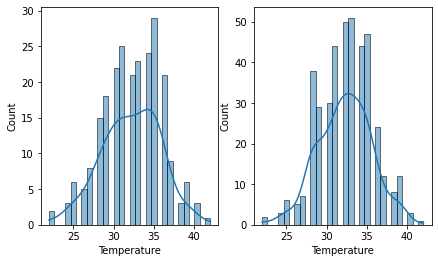

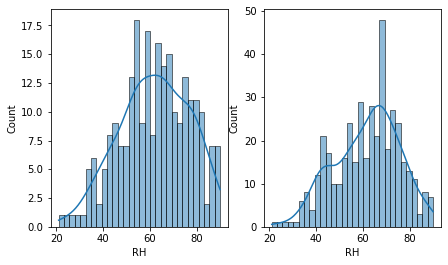

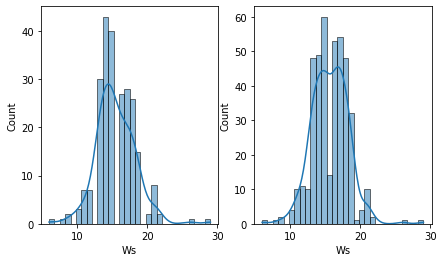

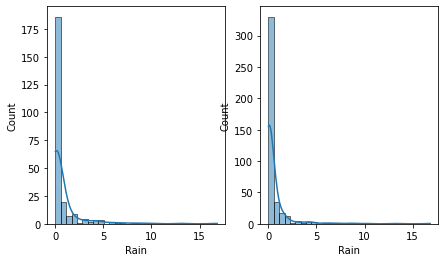

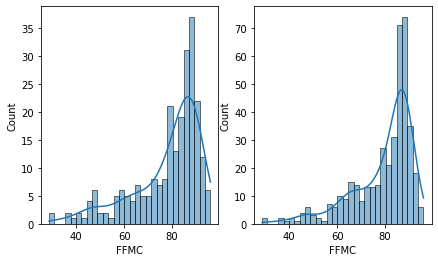

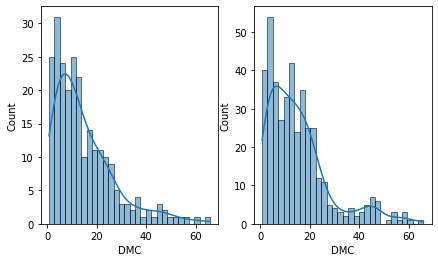

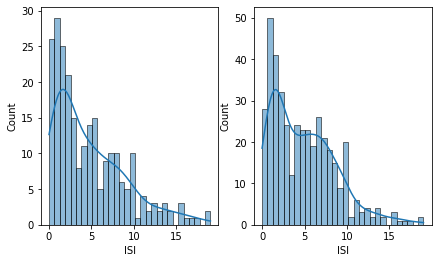

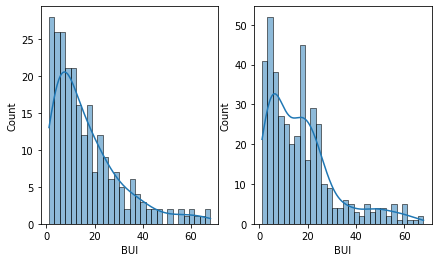

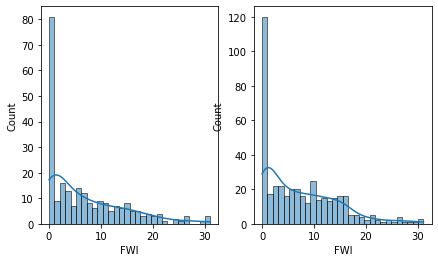

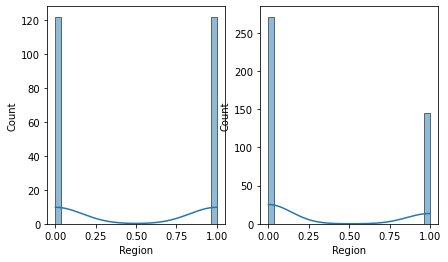

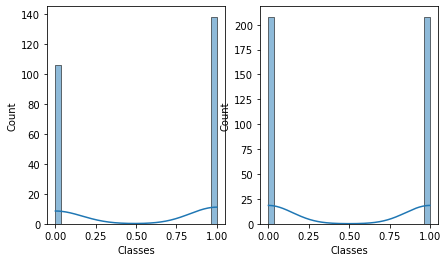

In [106]:
for i in num_bal_col:
    plt.figure(figsize=(7,4))
    plt.subplot(121)
    sns.histplot(data=df,x=i,kde=True,bins=30)
    
    
    plt.subplot(122)
    sns.histplot(data=df_bal,x=i,kde=True,bins=30)

# Checking the Outliers for Original and Balanced Dataset

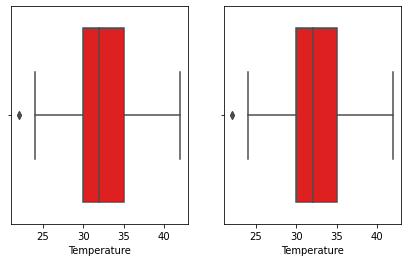

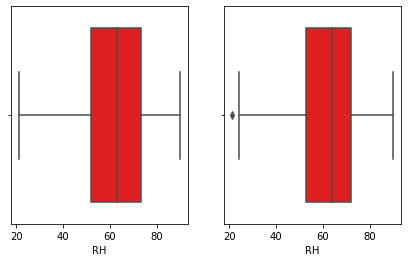

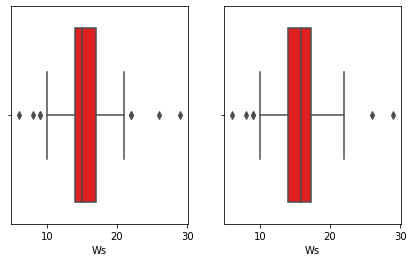

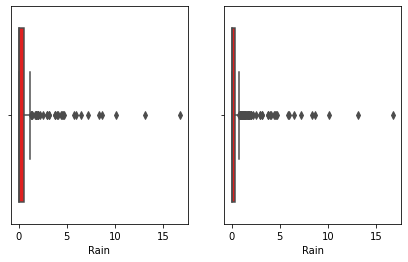

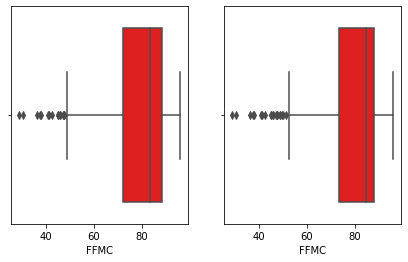

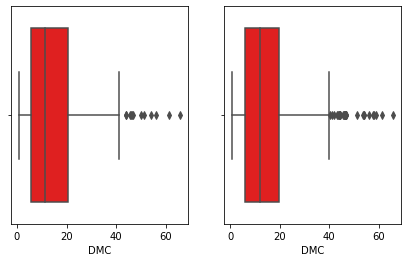

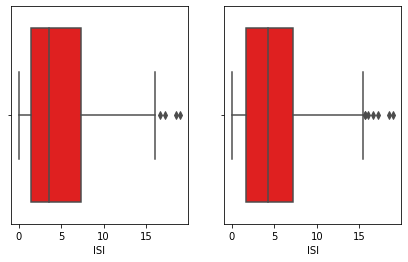

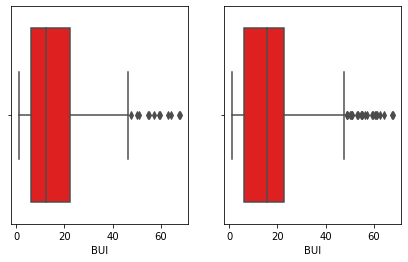

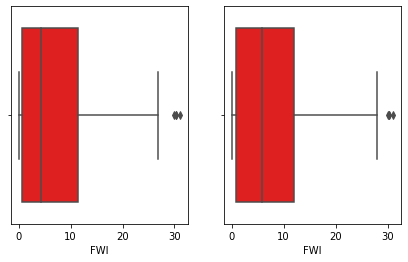

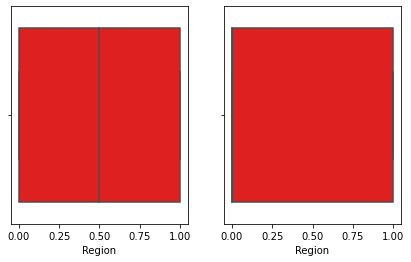

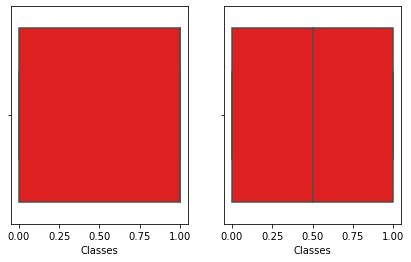

In [108]:
for i in num_bal_col:
    plt.figure(figsize=(7,4))
    plt.subplot(121)
    sns.boxplot(data=df,x=i,color='r')
    
    
    plt.subplot(122)
    sns.boxplot(data=df_bal,x=i,color='r')

# Train & Test Split

In [109]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x_res,y_res,test_size=0.25,random_state=16)

In [113]:
x_train1.shape, y_train1.shape

((312, 10), (312,))

In [114]:
x_test1.shape, y_test1.shape

((104, 10), (104,))

# Feature Scaling or standardize the dataset

In [118]:
#Standardize or Feature Scaling the dataset
from sklearn.preprocessing import StandardScaler

In [119]:
#Apply scaler on train and test data
x_train_tf1 = scaler.fit_transform(x_train1)
x_test_tf1 = scaler.transform(x_test1)

In [120]:
x_train_tf1

array([[-0.10806043,  0.97665572, -0.65440656, ..., -0.23045324,
        -0.08486899, -0.76403949],
       [ 0.81143561, -0.96147096,  0.03157369, ..., -0.01120069,
         0.09969424, -0.76403949],
       [ 0.81143561, -1.24860084,  0.50326119, ..., -0.47934159,
        -0.19944937,  1.30883287],
       ...,
       [-0.10806043,  0.11526608, -0.65440656, ..., -0.35134187,
        -0.08486899, -0.76403949],
       [ 0.19843825,  0.33061349,  1.08599539, ..., -0.03538439,
        -0.10595246, -0.76403949],
       [-0.41455911,  0.76130831, -0.65440656, ..., -0.97711827,
        -1.01583455,  1.30883287]])

In [121]:
x_test_tf1

array([[-1.02755647,  0.83309078,  0.44491727, ..., -0.62443681,
        -0.47785886, -0.76403949],
       [ 0.50493693, -0.10008133,  0.26343765, ..., -0.05649501,
         0.34658414, -0.76403949],
       [-0.10806043,  0.40239596, -0.34922022, ..., -0.39477771,
        -0.32580456, -0.76403949],
       ...,
       [-0.41455911,  1.26378559, -0.26851731, ...,  1.41932093,
         0.47371034, -0.76403949],
       [ 1.11793429, -0.74612355,  0.30152305, ...,  0.51499173,
         1.12353676, -0.76403949],
       [-0.41455911, -0.45899368, -1.81207432, ...,  0.12510154,
         0.12996921, -0.76403949]])

# 1) Logistic Regression Model after handling Imbalanced Dataset

In [122]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2

LogisticRegression()

In [123]:
model2.fit(x_train_tf1,y_train1)

LogisticRegression()

In [125]:
y_pred2 = model2.predict(x_test_tf1)
y_pred2
#predicted value

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0.])

In [126]:
y_test1
#actual value

307    0.0
310    0.0
412    0.0
163    1.0
178    1.0
      ... 
200    1.0
214    0.0
129    1.0
250    0.0
32     1.0
Name: Classes, Length: 104, dtype: float64

In [127]:
accuracy_score(y_test1, y_pred2)

0.6730769230769231

In [128]:
from sklearn.metrics import accuracy_score,classification_report
bal_score=accuracy_score(y_pred2,y_test1)
print(bal_score)

0.6730769230769231


# Performance Metrics

**1) Confusion Metrics**

In [131]:
conf_mat_bal=confusion_matrix(y_pred2,y_test1)
conf_mat_bal

array([[44, 20],
       [14, 26]], dtype=int64)

In [132]:
true_positive = conf_mat_bal[0][0]
false_positive = conf_mat_bal[0][1]
false_negative = conf_mat_bal[1][0]
true_negative = conf_mat_bal[1][1]

**2) Precision**

In [133]:
bal_Precision = true_positive/(true_positive+false_positive)
bal_Precision

0.6875

**3) Recall**

In [136]:
bal_Recall = true_positive/(true_positive+false_negative)
bal_Recall

0.7586206896551724

 **F1 Score**

In [138]:
F1_Score_bal = 2*(bal_Recall * bal_Precision) / (bal_Recall + bal_Precision)
F1_Score_bal

0.7213114754098361

# Conclusion

# Comparison of Logistic Model on Original Dataset and (Prepaired)Balanced dataset

# Classification Report

In [140]:
#Original Dataset
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        26
         1.0       0.95      1.00      0.97        35

    accuracy                           0.97        61
   macro avg       0.97      0.96      0.97        61
weighted avg       0.97      0.97      0.97        61



In [141]:
#Balanced Dataset
print(classification_report(y_pred2,y_test1))

              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72        64
         1.0       0.57      0.65      0.60        40

    accuracy                           0.67       104
   macro avg       0.66      0.67      0.66       104
weighted avg       0.68      0.67      0.68       104



# Observation

**- It seems that model is good when we predict from original dataset**

**- It seems that model is not accurate when we try to predict from balanced(created from an imbalanced dataset)**